# Statsmodels Time Series 
For this set of exercises we're using data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [14]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline
# Command to Download the Data from Source
df = pd.read_csv('/content/EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


### 1. Assign a frequency of 'MS' to the DatetimeIndex.

In [15]:
# CODE HERE

df.index.freq='MS '
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### 2. Plot the dataset.

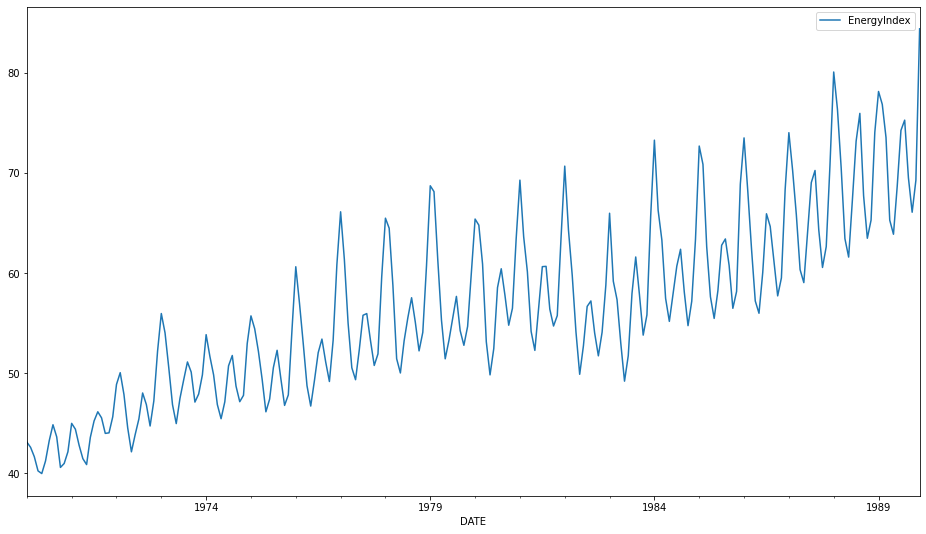

In [16]:
# Plotting the Graph 
df.plot(figsize=(16,9))

### 3. Add a column that shows a 12-month Simple Moving Average (SMA).<br>&nbsp;&nbsp;&nbsp;&nbsp;Plot the result.

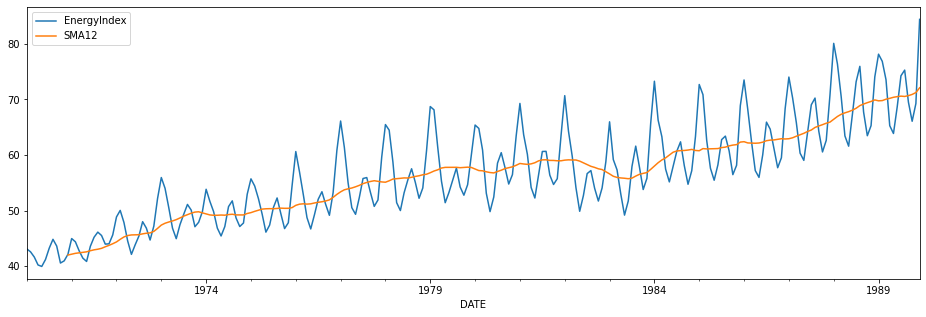

In [17]:

df['SMA12']=df['EnergyIndex'].rolling(window=12).mean()
df.plot(figsize=(16,5))

### 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result.

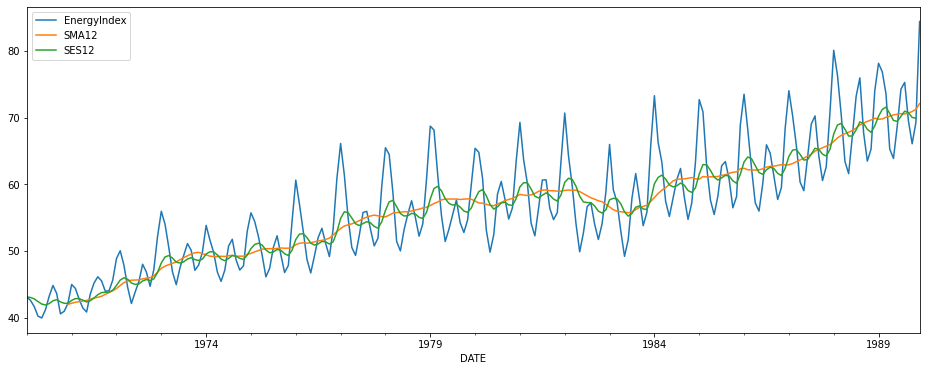

In [18]:
# Uploading Holts Winter Simple Smootihng Model to cover the Line Feature
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span=12
alpha=2/(span+1)
model=SimpleExpSmoothing(df['EnergyIndex'])
model.fit(smoothing_level=alpha,optimized=False)
fitted_model=model.fit(smoothing_level=alpha,optimized=False)
df['SES12']=fitted_model.fittedvalues.shift(-1)
df.plot(figsize=(16,6))



### 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


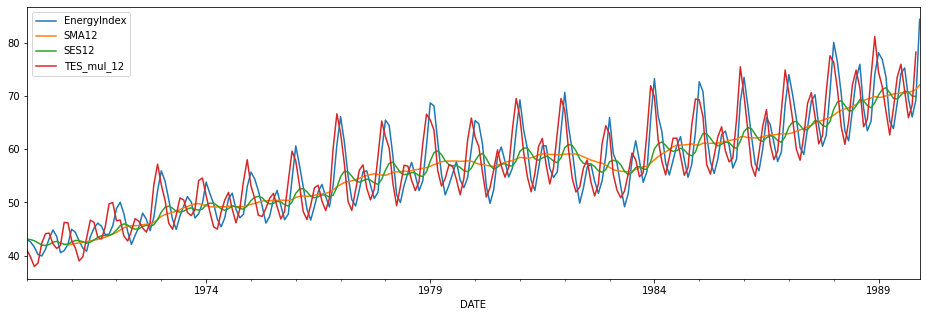

In [20]:
# Import Exponencial Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df['TES_mul_12']=ExponentialSmoothing(df['EnergyIndex'],trend='mul',seasonal_periods=12,seasonal='mul').fit().fittedvalues.shift(-1)
df.plot(figsize=(16,5))


### OPTIONAL: Plot the same  as above, but for only the first two years.

In [21]:
df.head()

,EnergyIndex,SMA12,SES12,TES_mul_12
DATE,,,,
1970-01-01,43.0869,NaN,43.086900,41.068033
1970-02-01,42.5577,NaN,43.005485,39.724705
1970-03-01,41.6215,NaN,42.792564,37.962045
1970-04-01,40.1982,NaN,42.393431,38.600767
1970-05-01,39.9321,NaN,42.014765,42.335699


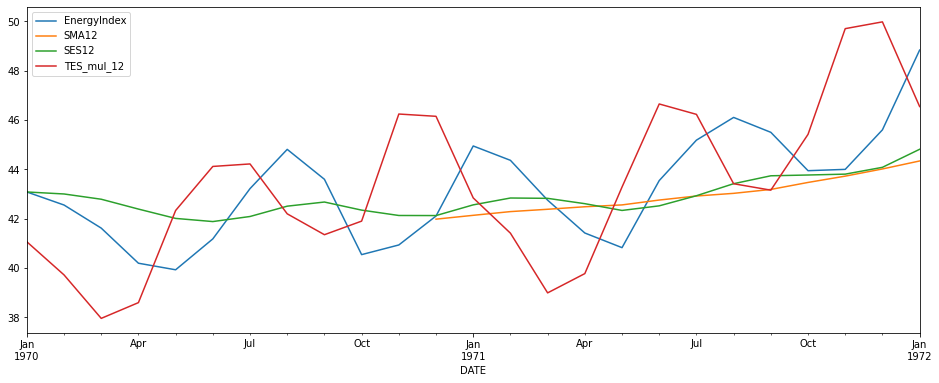

In [23]:
df[:'1972-01-01'].plot(figsize=(16,6))

## Great job!